In [35]:
run = False

## Creating BA networks

In [36]:
import networkx as nx
import matplotlib.pyplot as plt
if run:
    # BA Parameters: (#nodes, avg_edge_per_node)
    BA_info = [(1000,4),(1000,10), (1000,20),(2000,4),(2000,10),(2000,20),(3000,4),(3000,10),(3000,20)]

    # Generate BA graphs
    for x in BA_info:
        num_nodes, avg_degree = x[0], x[1]
        avg_edges = int(avg_degree/2)
        ba_graph = nx.barabasi_albert_graph(n=num_nodes, m=avg_edges)
        # Save as edge list
        nx.write_edgelist(ba_graph, f"./datasets/BA/ba_edgelist_{num_nodes}_{avg_degree}.edges", data=False)
    nx.draw(ba_graph, with_labels=False, node_color='lightblue', edge_color='gray', node_size=5, font_size=8)
    plt.show()


In [37]:
if run:
    # EXPERIMENT 1: Different BA network size in [3k, 4k, 5k, 6k, 7k, 8k] with average node degree = 4
    netsize=[3000, 4000, 5000, 6000, 7000, 8000]
    for x in netsize:
        avg_edges = 2 # 4/2
        ba_graph = nx.barabasi_albert_graph(n=x, m=avg_edges)
        # Save as edge list
        nx.write_edgelist(ba_graph, f"./datasets/BA_EXP/ba_edgelist_exp1_{x}_{4}.edges", data=False)

    # EXPERIMENT 2: Different BA average node degree in [4, 10, 20] with network size = 2k
    avg_degree = [4, 10, 20]
    for x in avg_degree:
        avg_edges = int(x/2)
        ba_graph = nx.barabasi_albert_graph(n=2000, m=avg_edges)
        # Save as edge list
        nx.write_edgelist(ba_graph, f"./datasets/BA_EXP/ba_edgelist_exp2_{2000}_{x}.edges", data=False)
        
    # EXPERIMENT 3: Different BA average node degree in [2, 6, 10] with network size = 4k
    avg_degree = [2, 6, 10]
    for x in avg_degree:
        avg_edges = int(x/2)
        ba_graph = nx.barabasi_albert_graph(n=4000, m=avg_edges)
        # Save as edge list
        nx.write_edgelist(ba_graph, f"./datasets/BA_EXP/ba_edgelist_exp3_{4000}_{x}.edges", data=False)
        


## Load all network graphs and show info

In [38]:
import os
import networkx as nx
import pandas as pd

directory = "./../datasets/"
graph_info = []
graph_list = []
for dirpath, _, files in os.walk(directory):
    for filename in files:
        try:
            if filename.endswith(".edges"):
                file_path = os.path.join(dirpath, filename) 
                graph_list.append(file_path)
                graph = nx.read_edgelist(file_path, comments="%", nodetype=int)
                # is_directed = isinstance(graph, nx.DiGraph)
                num_nodes = graph.number_of_nodes()
                num_edges = graph.number_of_edges()
                degrees = [deg for node, deg in graph.degree()]
                avg_degree = 2 * num_edges / num_nodes if num_nodes > 0 else 0
                max_degree = max(degrees) if degrees else 0
                min_degree = min(degrees) if degrees else 0
                avg_clustering_coefficient = nx.average_clustering(graph) if num_nodes > 0 else 0
                num_unconnected_subgraphs = nx.number_connected_components(graph)
                largest_component = max(nx.connected_components(graph), key=len, default=set())
                subgraph_largest_component = graph.subgraph(largest_component)
                portion_nodes_largest_component = ((len(largest_component) / num_nodes)*100) if num_nodes > 0 else 0
                portion_edges_largest_component = ((subgraph_largest_component.number_of_edges())*100) / num_edges if num_edges > 0 else 0
                density = nx.density(graph) if num_nodes > 0 else 0

                graph_info.append({
                    "graph G": os.path.splitext(filename)[0],
                    # "Is Directed": is_directed,
                    "#Nodes n": num_nodes,
                    "#Edges e": num_edges,
                    "Avg Degree <e>": avg_degree,
                    "Max Degree e_max": max_degree,
                    "Min Degree e_min": min_degree,
                    "Avg Clustering Coefficient c": avg_clustering_coefficient,
                    "#subgraphs s": num_unconnected_subgraphs,
                    "Portion Nodes in Largest Component Gn%": portion_nodes_largest_component,
                    "Portion Edges in Largest Component Ge%": portion_edges_largest_component,
                    "Density d": density
                })
        except Exception as e: 
            print(e, f'{filename}')

df = pd.DataFrame(graph_info)
# print(df)
df.to_excel("graph_info.xlsx", index=False)


## SIR Simulation

In [22]:
print("# ",len(graph_list), " graphs:")
for graph in graph_list:
    print(graph)

#  43  graphs:
./../datasets/BA\ba_edgelist_1000_10.edges
./../datasets/BA\ba_edgelist_1000_20.edges
./../datasets/BA\ba_edgelist_1000_4.edges
./../datasets/BA\ba_edgelist_2000_10.edges
./../datasets/BA\ba_edgelist_2000_20.edges
./../datasets/BA\ba_edgelist_2000_4.edges
./../datasets/BA\ba_edgelist_3000_10.edges
./../datasets/BA\ba_edgelist_3000_20.edges
./../datasets/BA\ba_edgelist_3000_4.edges
./../datasets/BA_EXP\ba_edgelist_exp1_3000_4.edges
./../datasets/BA_EXP\ba_edgelist_exp1_4000_4.edges
./../datasets/BA_EXP\ba_edgelist_exp1_5000_4.edges
./../datasets/BA_EXP\ba_edgelist_exp1_6000_4.edges
./../datasets/BA_EXP\ba_edgelist_exp1_7000_4.edges
./../datasets/BA_EXP\ba_edgelist_exp1_8000_4.edges
./../datasets/BA_EXP\ba_edgelist_exp2_2000_10.edges
./../datasets/BA_EXP\ba_edgelist_exp2_2000_20.edges
./../datasets/BA_EXP\ba_edgelist_exp2_2000_4.edges
./../datasets/BA_EXP\ba_edgelist_exp3_4000_10.edges
./../datasets/BA_EXP\ba_edgelist_exp3_4000_2.edges
./../datasets/BA_EXP\ba_edgelist_exp3

In [23]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def get_affected(status):
    affected = 0
    for node_status in status.values():
        if node_status!='S':
            affected+=1
    return affected


def get_recovered(status):
    recovered = 0
    for node_status in status.values():
        if node_status=='R':
            recovered+=1
    return recovered


# Function to plot the graph at a given time step
def plot_graph(G, status, title, pos):
    color_map = []
    for node in G:
        if status[node] == 'S':
            color_map.append('lightblue')  # Susceptible
        elif status[node] == 'I':
            color_map.append('red')  # Infected
        elif status[node] == 'R':
            color_map.append('green')  # Recovered
        elif status[node] == 'U':
            color_map.append('blue')  # Unsusceptible
    
    plt.figure(figsize=(6, 6))
    nx.draw(G, pos, node_color=color_map, with_labels=True, edge_color='gray', font_size=10)
    plt.title(title)
    plt.show()

# Function to update the infection and recovery process at each time step
def update_infection(G, status, infection_rate, recovery_rate):
    new_status = status.copy()

    for node in G.nodes():
        if status[node] == 'I':  # If the node is infected
            # Check if it's time to recover
            if random.random() < recovery_rate:
                new_status[node] = 'R'  # Recover
            else:
                # time to spread disease                 
                # Infect susceptible neighbors with a certain probability
                for neighbor in G.neighbors(node):
                    if status[neighbor] == 'S' and random.random() < infection_rate:
                        new_status[neighbor] = 'I'  # Neighbor gets infected

    return new_status



# Function to update the infection and recovery process at each time step
def update_infection_with_unsusceptible(G, status, infection_rate, recovery_rate):
    new_status = status.copy()

    for node in G.nodes():
        if status[node] == 'I':  # If the node is infected
            # Check if it's time to recover
            if random.random() < recovery_rate:
                new_status[node] = 'R'  # Recover
            else:
                # time to spread disease                 
                # Infect susceptible neighbors with a certain probability
                for neighbor in G.neighbors(node):
                    if status[neighbor] == 'S' and random.random() < infection_rate:
                        new_status[neighbor] = 'I'  # Neighbor gets infected
                    elif status[neighbor] == 'S': 
                        new_status[neighbor] = 'U'  # Neighbor becomes Unsusceptible

    return new_status


if run:
    # Create a graph (example)
    G = nx.Graph()
    G.add_edges_from([(1, 2), (1, 4), (1, 8), (2, 3), (3, 4), (4, 5), (4, 8), (5, 6), (6, 8), (7, 8), (7, 9), (8, 9)])

    # Parameters for the SIR model
    infection_rate = 0.3  # Beta (probability of infection transmission)
    recovery_rate = 0.1   # Gamma (probability of recovery)

    # Initial state of nodes: all susceptible
    status = {node: 'S' for node in G.nodes()}

    # Start by infecting one node (e.g., node 1)
    initial_infecteds = [1]
    for node in initial_infecteds:
        status[node] = 'I'  # Infect the initial node

    # # Recovery tracker: how long each node has been infected
    # recovered = {node: node for node in G.nodes()}
    # def get_recovered(G, status):



    # Position the graph layout
    pos = nx.spring_layout(G)

    # Run the SIR simulation for a number of steps
    num_steps = 5
    for step in range(num_steps):
        # Plot the current state of the graph
        plot_graph(G, status, f"Step {step}", pos)
        
        # Update the infection and recovery process
        # status = update_infection_with_unsusceptible(G, status, infection_rate, recovery_rate)
        status = update_infection(G, status, infection_rate, recovery_rate)

    # Plot the final state of the graph
    plot_graph(G, status, f"Final State", pos)
    print("affected: ", get_affected(status))


In [24]:
if run:
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    degrees = [deg for node, deg in G.degree()]
    avg_degree = 2 * num_edges / num_nodes if num_nodes > 0 else 0
    # Average squared degree
    avg_squared_degree = sum(deg**2 for deg in degrees) / num_nodes if num_nodes > 0 else 0

    print("<k>",avg_degree)
    print("<k_2>",avg_squared_degree)
    print("<k>/(<k_2>-<k>)",avg_degree/(avg_squared_degree-avg_degree))

## Implementation of SIR model

In [25]:
def get_Bs(b_threshold, steps=10):
    step = (0.9*b_threshold)/steps
    return [round(i*step+b_threshold, 2) for i in range(steps)]

def init_status(G, initial_infected_node):
    
    # Initial state of nodes: all susceptible
    status = {node: 'S' for node in G.nodes()}

    # Start by infecting one node (e.g., node 1)
    for node in initial_infected_node:
        status[node] = 'I'  # Infect the initial node
    return status
        

# variables: num_steps_per_iter
def sir(G, recovery_rate, num_steps_per_iter):
    pos = nx.spring_layout(G)
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    degrees = [deg for node, deg in G.degree()]
    avg_degree = 2 * num_edges / num_nodes if num_nodes > 0 else 0
    # Average squared degree
    avg_squared_degree = sum(deg**2 for deg in degrees) / num_nodes if num_nodes > 0 else 0
    b_threshold = avg_degree/(avg_squared_degree-avg_degree)
    bs= get_Bs(b_threshold, num_steps_per_iter)
    bs_recovered_dict = {}
    bs_affected_dict = {}
    b_is = {} 
    for b in bs:
        status = init_status(G, [1])
        for step in range(num_steps_per_iter):        
            # Update the infection and recovery process
            # status = update_infection_with_unsusceptible(G, status, infection_rate=b, recovery_rate=recovery_rate)
            status = update_infection(G, status, infection_rate=b, recovery_rate=recovery_rate)
        # plot_graph(G, status, f"for b={b}", pos)
        bs_affected_dict[b] = get_affected(status)
        num_recovered = get_recovered(status)
        bs_recovered_dict[b] =  num_recovered
        b_is[b] = num_recovered/num_nodes
    return bs_recovered_dict, bs_affected_dict, b_is
        
if run:
    print(get_Bs(4.8))

{0.48: 0.5555555555555556, 0.49: 0.8888888888888888, 0.5: 0.1111111111111111, 0.51: 1.0, 0.52: 0.1111111111111111, 0.53: 1.0, 0.54: 1.0, 0.55: 1.0, 0.56: 1.0, 0.57: 1.0, 0.58: 1.0, 0.59: 1.0, 0.6: 0.1111111111111111, 0.61: 0.7777777777777778, 0.62: 0.1111111111111111, 0.63: 1.0, 0.64: 1.0, 0.65: 0.7777777777777778, 0.66: 1.0, 0.67: 0.1111111111111111, 0.68: 1.0, 0.69: 1.0, 0.7: 0.7777777777777778, 0.71: 0.1111111111111111, 0.72: 1.0, 0.73: 1.0, 0.74: 1.0, 0.75: 1.0, 0.76: 1.0, 0.77: 0.6666666666666666, 0.78: 1.0, 0.79: 1.0, 0.8: 0.1111111111111111, 0.81: 1.0, 0.82: 1.0, 0.83: 1.0, 0.84: 1.0, 0.85: 1.0, 0.86: 1.0, 0.87: 1.0, 0.88: 1.0, 0.89: 1.0, 0.9: 1.0, 0.91: 0.7777777777777778}


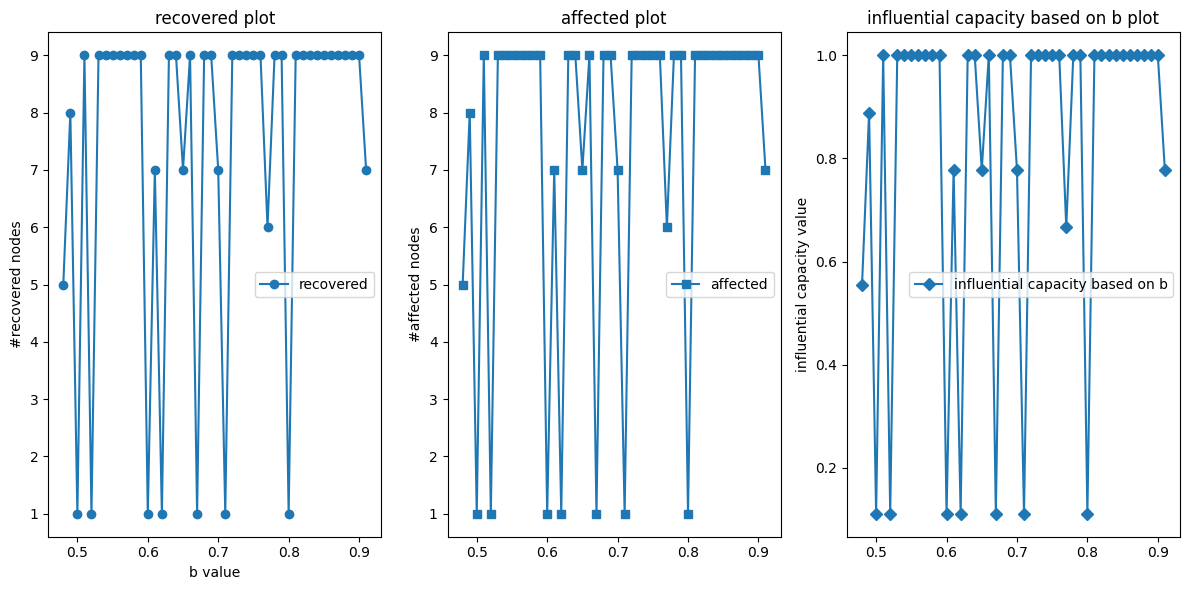

In [26]:
bs_recovered_dict, bs_affected_dict, b_is= sir(G, 0.1, 200)
# Create subplots
print(b_is)
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# Extract x and y values
x1 = list(bs_recovered_dict.keys())
y1 = list(bs_recovered_dict.values())

# Plot the first set of points
axs[0].plot(x1, y1, 'o-', label='recovered')
axs[0].set_xlabel("b value")
axs[0].set_ylabel('#recovered nodes')
axs[0].set_title('recovered plot')
axs[0].legend()

# Extract x and y values for the second dictionary
x2 = list(bs_affected_dict.keys())
y2 = list(bs_affected_dict.values())

# Plot the second set of points
axs[1].plot(x2, y2, 's-', label='affected')
axs[1].set_ylabel('#affected nodes')
axs[1].set_title('affected plot')
axs[1].legend()

# Extract x and y values for the third dictionary
x3 = list(b_is.keys())
y3 = list(b_is.values())

# Plot the third set of points
axs[2].plot(x3, y3, 'D-', label='influential capacity based on b')
axs[2].set_ylabel('influential capacity value')
axs[2].set_title('influential capacity based on b plot')
axs[2].legend()
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [27]:

# variables: num_iterations, num_steps_per_iter
def sir_func(G, recovery_rate, num_steps_per_iter, num_iterations, initial_infected_nodes):
    pos = nx.spring_layout(G)
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    degrees = [deg for node, deg in G.degree()]
    avg_degree = 2 * num_edges / num_nodes if num_nodes > 0 else 0
    # Average squared degree
    avg_squared_degree = sum(deg**2 for deg in degrees) / num_nodes if num_nodes > 0 else 0
    b_threshold = avg_degree/(avg_squared_degree-avg_degree)
    bs= get_Bs(b_threshold, num_steps_per_iter)
    recovered_sum = 0
    b_is = {} 
    for b in bs:
        recovered_sum = 0
        for i in range(num_iterations):
            status = init_status(G, initial_infected_nodes)
            for step in range(num_steps_per_iter):        
                # Update the infection and recovery process
                # status = update_infection_with_unsusceptible(G, status, infection_rate=b, recovery_rate=recovery_rate)
                status = update_infection(G, status, infection_rate=b, recovery_rate=recovery_rate)
            # plot_graph(G, status, f"for b={b}", pos)
            recovered_sum +=  get_recovered(status)
        b_is[b] = round(recovered_sum/(num_iterations*num_nodes), 3)
    return  b_is
        

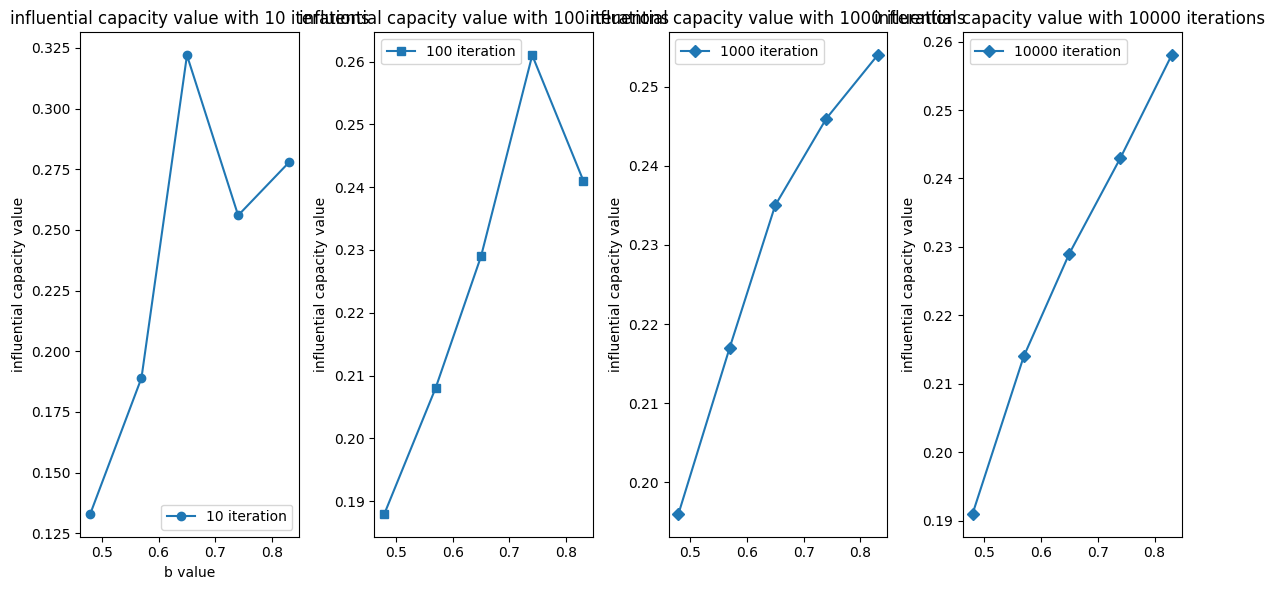

In [28]:
b_is_10= sir_func(G, 0.1, 5, 10, [1])
b_is_100= sir_func(G, 0.1, 5, 100, [1])
b_is_1000= sir_func(G, 0.1, 5, 1000, [1])
b_is_10000= sir_func(G, 0.1, 5, 10000, [1])
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(12, 6))

# Extract x and y values for the first dictionary

# Extract x and y values
x1 = list(b_is_10.keys())
y1 = list(b_is_10.values())

# Plot the first set of points
axs[0].plot(x1, y1, 'o-', label='10 iteration')
axs[0].set_xlabel("b value")
axs[0].set_ylabel('influential capacity value')
axs[0].set_title('influential capacity value with 10 iterations')
axs[0].legend()

# Extract x and y values for the second dictionary
x2 = list(b_is_100.keys())
y2 = list(b_is_100.values())

# Plot the second set of points
axs[1].plot(x2, y2, 's-', label='100 iteration')
axs[1].set_ylabel('influential capacity value')
axs[1].set_title('influential capacity value with 100 iterations')
axs[1].legend()

# Extract x and y values for the third dictionary
x3 = list(b_is_1000.keys())
y3 = list(b_is_1000.values())

# Plot the third set of points
axs[2].plot(x3, y3, 'D-', label='1000 iteration')
axs[2].set_ylabel('influential capacity value')
axs[2].set_title('influential capacity value with 1000 iterations ')
axs[2].legend()

# Extract x and y values for the forth dictionary
x4 = list(b_is_10000.keys())
y4 = list(b_is_10000.values())

# Plot the third set of points
axs[3].plot(x4, y4, 'D-', label='10000 iteration')
axs[3].set_ylabel('influential capacity value')
axs[3].set_title('influential capacity value with 10000 iterations ')
axs[3].legend()


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Labeling based on SIR Model

In [29]:
def print_list(list):
    print("[")
    for el in list:
        print(el, end=',\n')
    print("]")

# rotate on the nodes of each graph
# find their sir and sort them
def sir_model(G, recovery_rate, num_steps_per_iter, num_iterations):
    nodes_list = list(G.nodes()) 
    b_list = []
    for i in nodes_list: 
        b_is= sir_func(G, recovery_rate, num_steps_per_iter, num_iterations, [i])
        b_list.append((i, b_is ))
    return b_list
b_list = sir_model(G, 0.1,5,1000)
print_list(b_list)

[
(1, {0.48: 0.195, 0.57: 0.21, 0.65: 0.224, 0.74: 0.249, 0.83: 0.257}),
(2, {0.48: 0.146, 0.57: 0.163, 0.65: 0.18, 0.74: 0.193, 0.83: 0.21}),
(4, {0.48: 0.207, 0.57: 0.23, 0.65: 0.234, 0.74: 0.265, 0.83: 0.271}),
(8, {0.48: 0.221, 0.57: 0.24, 0.65: 0.255, 0.74: 0.268, 0.83: 0.273}),
(3, {0.48: 0.142, 0.57: 0.179, 0.65: 0.183, 0.74: 0.203, 0.83: 0.215}),
(5, {0.48: 0.148, 0.57: 0.173, 0.65: 0.19, 0.74: 0.207, 0.83: 0.218}),
(6, {0.48: 0.154, 0.57: 0.176, 0.65: 0.201, 0.74: 0.213, 0.83: 0.23}),
(7, {0.48: 0.153, 0.57: 0.166, 0.65: 0.189, 0.74: 0.204, 0.83: 0.213}),
(9, {0.48: 0.15, 0.57: 0.172, 0.65: 0.176, 0.74: 0.201, 0.83: 0.214}),
]


In [30]:
def get_Bdict_from_Blist(b_list):
    b_dict = {}
    for b in b_list[0][1].keys():
        b_dict[b] = []
        for el in b_list:
            node = el[0]
            node_is = el[1].get(b)
            b_dict[b].append((node, node_is))
    return b_dict
b_dict = get_Bdict_from_Blist(b_list)
b_dict

{0.48: [(1, 0.195),
  (2, 0.146),
  (4, 0.207),
  (8, 0.221),
  (3, 0.142),
  (5, 0.148),
  (6, 0.154),
  (7, 0.153),
  (9, 0.15)],
 0.57: [(1, 0.21),
  (2, 0.163),
  (4, 0.23),
  (8, 0.24),
  (3, 0.179),
  (5, 0.173),
  (6, 0.176),
  (7, 0.166),
  (9, 0.172)],
 0.65: [(1, 0.224),
  (2, 0.18),
  (4, 0.234),
  (8, 0.255),
  (3, 0.183),
  (5, 0.19),
  (6, 0.201),
  (7, 0.189),
  (9, 0.176)],
 0.74: [(1, 0.249),
  (2, 0.193),
  (4, 0.265),
  (8, 0.268),
  (3, 0.203),
  (5, 0.207),
  (6, 0.213),
  (7, 0.204),
  (9, 0.201)],
 0.83: [(1, 0.257),
  (2, 0.21),
  (4, 0.271),
  (8, 0.273),
  (3, 0.215),
  (5, 0.218),
  (6, 0.23),
  (7, 0.213),
  (9, 0.214)]}

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[0.187, 0.142, 0.149, 0.211, 0.151, 0.155, 0.151, 0.22, 0.151]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[0.213, 0.163, 0.17, 0.241, 0.175, 0.178, 0.171, 0.244, 0.161]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[0.236, 0.175, 0.184, 0.238, 0.19, 0.203, 0.18, 0.254, 0.181]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[0.245, 0.202, 0.21, 0.254, 0.202, 0.212, 0.198, 0.268, 0.201]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[0.259, 0.204, 0.22, 0.274, 0.229, 0.233, 0.214, 0.285, 0.208]


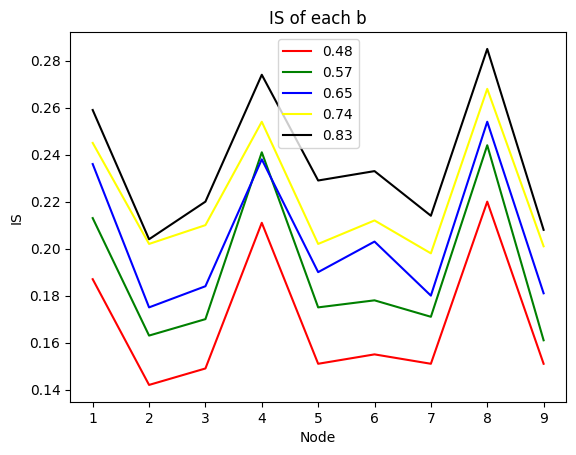

In [31]:
def plot_node_importance_using_sir(G):
    b_list = sir_model(G, 0.1,5,1000)
    # print_list(b_list)
    b_dict = get_Bdict_from_Blist(b_list)
    colors = ['red', 'green','blue','yellow','black','cyan','magenta']
    i = 0
    for b in b_dict.keys():
        b_dict[b]=sorted(b_dict[b], key=lambda x: x[0])
        x_  = [x[0] for x in b_dict[b]]
        y_  = [y[1] for y in b_dict[b]]
        print(x_)
        print(y_)
        plt.plot(x_ , y_, color=colors[i], label=f'{b}')
        i+=1

    # Add labels and title
    plt.xlabel('Node')
    plt.ylabel('IS')
    plt.title('IS of each b')

    # Add a legend to differentiate lines
    plt.legend()

    # Show the plot
    plt.show()
plot_node_importance_using_sir(G)

sorted_dict = sorted(b_dict[list(b_dict.keys())[2]] , key=lambda x: x[0])
x_  = [x[0] for x in sorted_dict]

y_  = [y[1] for y in sorted_dict]
# print(sorted_dict)

Now cheking using the centralities

[0.262, 0.205, 0.219, 0.275, 0.22, 0.227, 0.217, 0.285, 0.215]
[0.7125 0.     0.175  0.875  0.1875 0.275  0.15   1.     0.125 ]


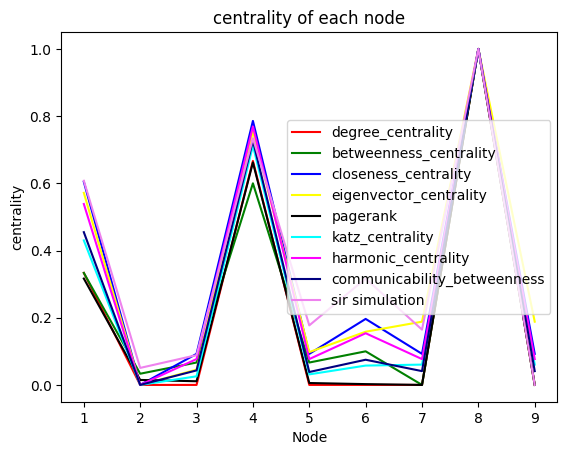

In [32]:
import numpy as np
def normalize(l):
    l = list(l)
    return  (l - np.min(l)) / (np.max(l) - np.min(l))

def sort_dict(my_dict):
    sorted_keys = sorted(my_dict.keys())
    sorted_values = [my_dict[key] for key in sorted_keys]
    return sorted_keys, sorted_values

def plot_node_importance_using_centrality(G):
    colors = ['red', 'green','blue','yellow','black','cyan','magenta', 'navy', 'violet']
    i=0
    x_degree_centrality, y_degree_centrality=sort_dict(nx.degree_centrality(G))
    plt.plot(x_degree_centrality , normalize(y_degree_centrality), color=colors[i], label='degree_centrality')
    i+=1

    x_betweenness_centrality, y_betweenness_centrality = sort_dict(nx.betweenness_centrality(G)) 
    plt.plot(x_betweenness_centrality , normalize(y_betweenness_centrality), color=colors[i], label='betweenness_centrality')
    i+=1

    x_closeness_centrality, y_closeness_centrality = sort_dict(nx.closeness_centrality(G))
    plt.plot(x_closeness_centrality , normalize(y_closeness_centrality), color=colors[i], label='closeness_centrality')
    i+=1

    x_eigenvector_centrality, y_eigenvector_centrality = sort_dict(nx.eigenvector_centrality(G))
    plt.plot(x_eigenvector_centrality , normalize(y_eigenvector_centrality), color=colors[i], label='eigenvector_centrality')
    i+=1

    x_pagerank, y_pagerank = sort_dict(nx.pagerank(G))
    plt.plot(x_pagerank , normalize(y_pagerank), color=colors[i], label='pagerank')
    i+=1

    x_katz_centrality, y_katz_centrality = sort_dict(nx.katz_centrality(G))
    plt.plot(x_katz_centrality , normalize(y_katz_centrality), color=colors[i], label='katz_centrality')
    i+=1

    x_harmonic_centrality, y_harmonic_centrality = sort_dict(nx.harmonic_centrality(G))
    plt.plot(x_harmonic_centrality, normalize(y_harmonic_centrality), color=colors[i], label='harmonic_centrality')
    i+=1

    x_communicability_betweenness, y_communicability_betweenness = sort_dict(nx.communicability_betweenness_centrality(G))
    plt.plot(x_communicability_betweenness , normalize(y_communicability_betweenness), color=colors[i], label='communicability_betweenness')
    i+=1

    
    plt.plot(x_ , normalize(y_), color=colors[i], label='sir simulation')


    plt.xlabel('Node')
    plt.ylabel('centrality')
    plt.title('centrality of each node')

    # Add a legend to differentiate lines
    plt.legend()

    # Show the plot
    plt.show()
print([0.262, 0.205, 0.219, 0.275, 0.22, 0.227, 0.217, 0.285, 0.215])
print(normalize([0.262, 0.205, 0.219, 0.275, 0.22, 0.227, 0.217, 0.285, 0.215]))
plot_node_importance_using_centrality(G)

## Tried the above and it wasnt fast enough, so here is an implementation of it using library EoN

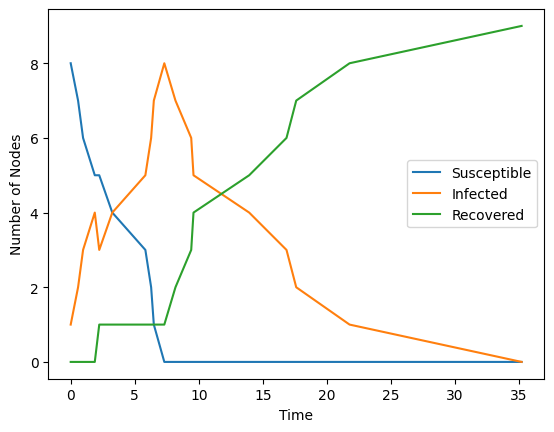

In [33]:
import EoN

# Set the transmission rate (beta) and recovery rate (gamma)
tau = 0.3  # same as beta
gamma = 0.1

# Initial infected node(s)
initial_infected = [1] 

# Run the SIR model using EoN
t, S, I, R = EoN.fast_SIR(G, tau, gamma, initial_infecteds=initial_infected)
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Number of Nodes')
plt.legend()
plt.show()


## Labeling
#### Since we have checked that sir works nicely in identifying the importance of each node, we will start labeling the data of each graph

In [34]:

directory = "./datasets/"
graph_list = []
for dirpath, _, files in os.walk(directory):
    for filename in files:
        try:
            if filename.endswith(".edges"):
                file_path = os.path.join(dirpath, filename) 
                graph_list.append(file_path)
                graph = nx.read_edgelist(file_path, comments="%", nodetype=int)
                b_list = sir_model(graph, 0.1,5,1000)
                b_dict = get_Bdict_from_Blist(b_list)
                i = 0
                for b in b_dict.keys():
                    b_dict[b]=sorted(b_dict[b], key=lambda x: x[0])
                    x_  = [t[0] for t in b_dict[b]]
                    y_  = [t[1] for t in b_dict[b]]
                    Sir = pd.DataFrame({'Node':x_,'SIR':y_})
                    Sir.to_csv(f'{filename}.csv',index=False)
                    i+=1
        except Exception as e: 
            print(e, f'{filename}')